<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools</div>
<div style="text-align: right">AssignmentTeam8 - Yucong Feng</div>
<div style="text-align: right">NUID - 001586064</div>

# Assignment4: Movie Book(How to make a Comic Book)

In [1]:
from IPython.display import Image

**Find the current path of the directory and change the working directory**

In [1]:
import os

path = os.getcwd()

path = "E:/Northeastern/Semester2/INFO6105-datascience/Assignment4"

os.chdir(path)

retval = os.getcwd()

print("Current Path:",retval)

Current Path: E:\Northeastern\Semester2\INFO6105-datascience\Assignment4


**Prepare the cover image for the movie book**

In [2]:
from PIL import Image as pili, ImageOps as piliops

In [3]:
piliops.expand(pili.open('01.png'), border=(20,20),fill='black').save('01_new.png') #coverpage_original

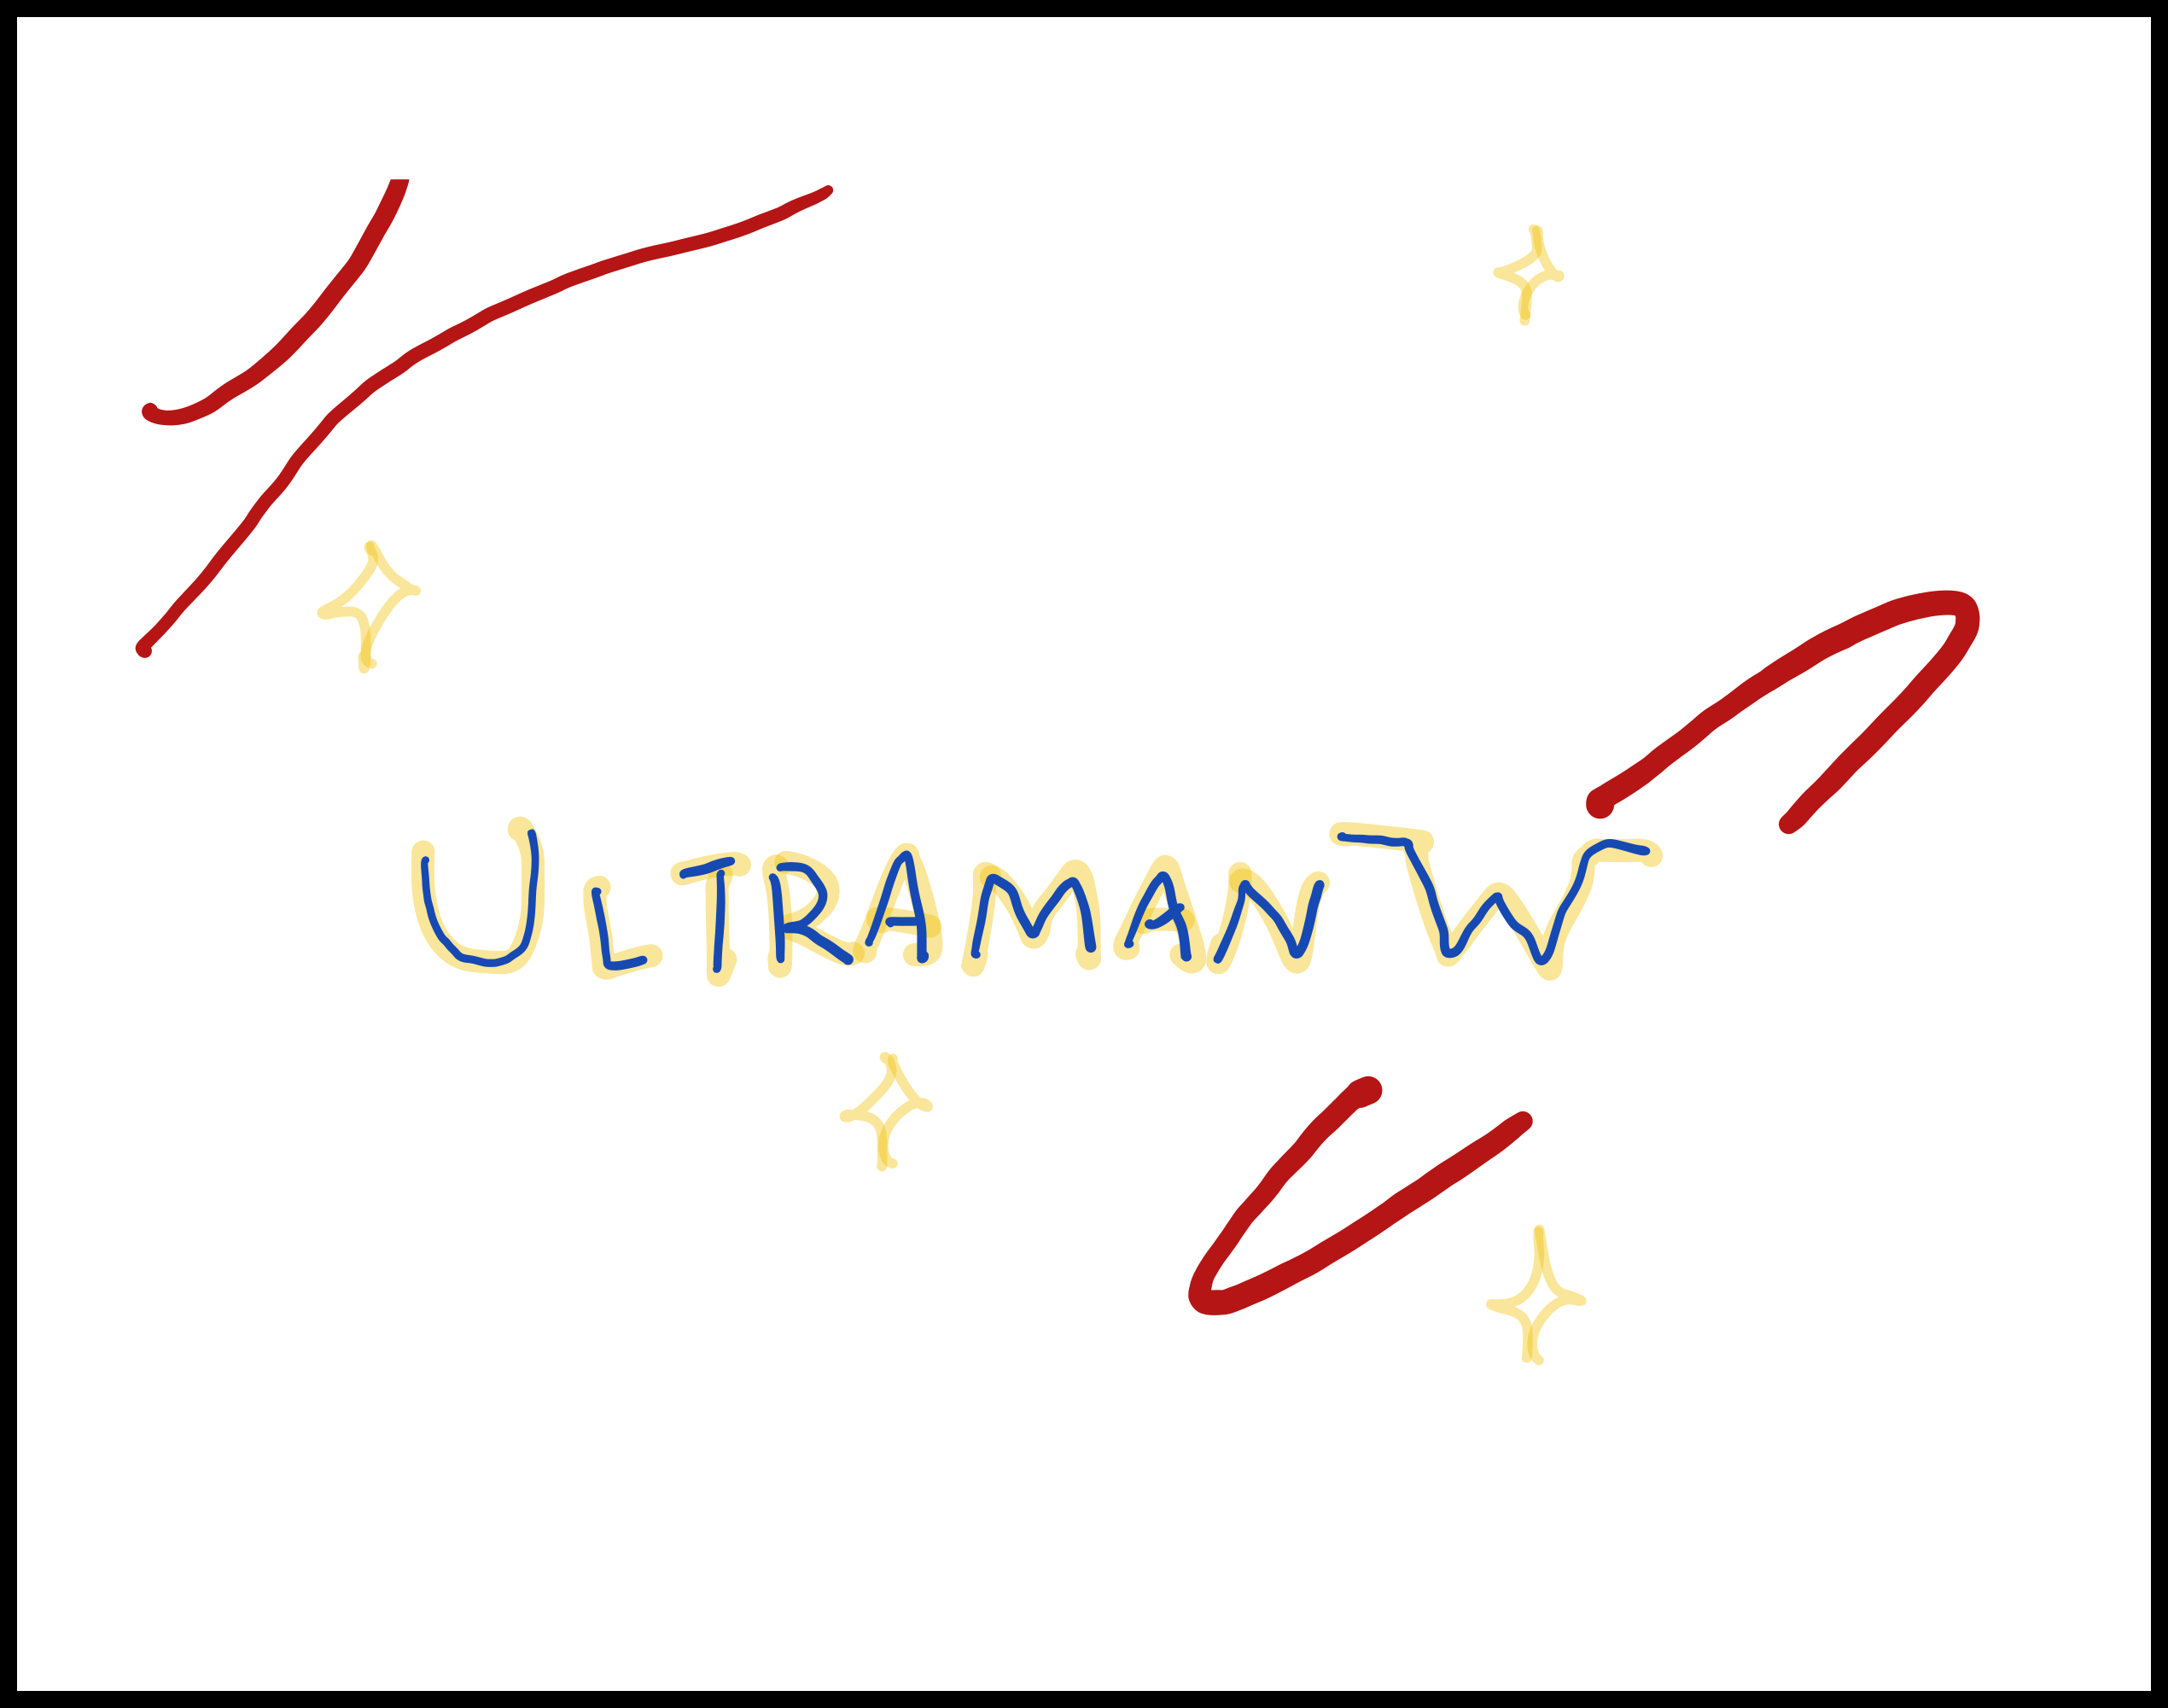

In [9]:
Image(filename='01_new.png', width=400)#coverpage to use

# Code: Prepare comic book in English language 


**Read the csv files which contains all the dialogues in English**

In [4]:
import pandas as pd
data = pd.read_csv('dialog.csv',error_bad_lines=False)
data

,dialogs
0,English Title
1,Chinese & EnglishTitle
2,Character Introduction
3,Ultra-watch Introduction
4,Broadcast: Attention SAT Teams! Please investi...
...,...
131,Or change the appearance...
132,As long as the passion remains the same...
133,Even face up with difficulties...
134,There will always be hope.


In [5]:
from PIL import Image as pili, ImageDraw as pild, ImageFont as pilf 
import numpy as np
from PIL import Image, ImageFont, ImageDraw

Code to overlay the dialogues on the images

In [24]:
for i in range(len(data)): 
    data_value = data.values[i][0]
    
    caption = data_value   
    TINT_COLOR = (0,0,0)  # Black
    TRANSPARENCY = .25  # Degree of transparency, 0-100%
    OPACITY = int(255 * TRANSPARENCY)


    img = pili.open(path+"/Images/Page"+str(i)+".png").convert('RGBA')
    #img = pili.open("C:/Users/manis/OneDrive/Documents/DSEM/Assignments/Assignment4/Images/Image0.png").convert('RGBA')

    overlay = pili.new('RGBA', img.size, TINT_COLOR+(0,))
    draw = pild.Draw(overlay)
    #font = ImageFont.load_default()
    font = pilf.truetype("arial.ttf", 40)
    #font = pilf.truetype("Noto_Sans/NotoSans-Bold.ttf", 36)
    #x, y = (img.width - 510, img.height-100)
    text = caption
    w, h = font.getsize(text)
    num_lines = len(text.split('/n'))
    #print(num_lines, w, h)
    x, y = 50, img.height - (num_lines-0.1*num_lines)*h*1.2
    #draw.rectangle((x, y, x + w, y + h), fill='black')
    #draw.rectangle((x, y, x + w, y + 4*h), fill=TINT_COLOR+(OPACITY,))
    draw.rectangle((x, y, x + img.width - 200, y + (num_lines-0.1*num_lines)*h*1.09), fill=TINT_COLOR+(OPACITY,))
    draw.multiline_text((x, y), text, fill=(0, 0, 0), font=font)
    

    # Alpha composite these two images together to obtain the desired result.
    img = pili.alpha_composite(img, overlay)
    img = img.convert("RGB") # Remove alpha for saving in jpg format.

    img.save(path+"/Final_Images/English/"+str(i)+ '.jpg')
    

In [25]:
import os
filelist=os.listdir(path+'/Final_Images/English/')
for fetch in filelist[:]: # filelist[:] makes a copy of filelist.
    if not(fetch.endswith(".jpg")):
        filelist.remove(fetch)
#print(filelist)

**Sorting the images in the directory using filename**

In [11]:
pip install natsort

In [26]:
from natsort import natsort_keygen
natsort_key = natsort_keygen()
sorted_files = sorted(filelist, key=natsort_key)

#sorted_files = sorted(filelist, key= lambda temp: temp[:-4].lower())
#print(sorted_files[20:40])

**Putting 20 images in a grid**

In [30]:
import PIL, os, glob
from PIL import Image
from math import ceil, floor

PATH = path+'/Final_Images/English/'

frame_width = 1920
images_per_row = 4
padding = 20

os.chdir(PATH)

#images = glob.glob("*.jpg")
images = sorted_files[0:20] #get the first 20 images
#print(images)

img_width, img_height = Image.open(images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(path +"/Final_Images/English_Final/out1.jpg", "JPEG", quality=100, optimize=True, progressive=True)

#page2
#images = glob.glob("*.jpg")
images = sorted_files[21:41] #get the first 20 images
#print(images)

img_width, img_height = Image.open(images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(path +"/Final_Images/English_Final/out2.jpg", "JPEG", quality=100, optimize=True, progressive=True)

#page3
#images = glob.glob("*.jpg")
images = sorted_files[42:62] #get the first 20 images
#print(images)

img_width, img_height = Image.open(images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(path +"/Final_Images/English_Final/out3.jpg", "JPEG", quality=100, optimize=True, progressive=True)

#page4
#images = glob.glob("*.jpg")
images = sorted_files[63:83] #get the first 20 images
#print(images)

img_width, img_height = Image.open(images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(path +"/Final_Images/English_Final/out4.jpg", "JPEG", quality=100, optimize=True, progressive=True)

#page5
#images = glob.glob("*.jpg")
images = sorted_files[84:104] #get the first 20 images
#print(images)

img_width, img_height = Image.open(images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(path +"/Final_Images/English_Final/out5.jpg", "JPEG", quality=100, optimize=True, progressive=True)

#page6
#images = glob.glob("*.jpg")
images = sorted_files[105:125] #get the first 20 images
#print(images)

img_width, img_height = Image.open(images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(path +"/Final_Images/English_Final/out6.jpg", "JPEG", quality=100, optimize=True, progressive=True)

#page7
#images = glob.glob("*.jpg")
images = sorted_files[126:146] #get the first 20 images
#print(images)

img_width, img_height = Image.open(images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(path +"/Final_Images/English_Final/out7.jpg", "JPEG", quality=100, optimize=True, progressive=True)

**Converting Grid Images to pdf + Adding the coverpage**

In [12]:
pip install FPDF

  Created wheel for FPDF: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=c8104dc345549b559005202e58f92948fc6e92345311543461b89c4270f980ea
  Stored in directory: c:\users\super\appdata\local\pip\cache\wheels\b4\7f\00\f90ea7c44f8b921477205baa66a7aaf04be398f743ea946fd5
Successfully built FPDF
Note: you may need to restart the kernel to use updated packages.


In [31]:
from PIL import Image
from fpdf import FPDF

im = Image.open(path+"/01_new.png")
rgb_im = im.convert('RGB')
rgb_im.save(path + "/Final_Images/English_Final/cover.jpg")
os.chdir(path + "/Final_Images/English_Final/")

#pdf = FPDF()
cover = Image.open(path + "/01_new.png")
width, height = cover.size

pdf = FPDF(unit = "pt", format = [width, height])


# imagelist is the list with all image filenames
imagelist = ['cover.jpg','out1.jpg','out2.jpg','out3.jpg','out4.jpg','out5.jpg','out6.jpg','out7.jpg']#,'out1.jpg','out2.jpg']

for image in imagelist:
    pdf.add_page()
    pdf.image(image, 0, 0, width, height)
pdf.output("Ultraman W（English）.pdf", "F")
print("Done! PDF is ready to view")

Done! PDF is ready to view
